
# **Production Data Analysis**

This notebook performs a **comprehensive Exploratory Data Analysis (EDA)** and **descriptive statistics** on the `production.csv` dataset.  
It examines machine performance, energy usage, downtime, and maintenance indicators to extract actionable insights for manufacturing optimization.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "production.csv"  # ensure this file is in the same directory
df = pd.read_csv(file_path)

# Basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           2460 non-null   object 
 1   machine_id          2460 non-null   object 
 2   machine_type        2460 non-null   object 
 3   temperature         2411 non-null   float64
 4   vibration_level     2404 non-null   float64
 5   power_consumption   2405 non-null   float64
 6   pressure            2460 non-null   float64
 7   material_flow_rate  2460 non-null   float64
 8   cycle_time          2460 non-null   float64
 9   error_rate          2460 non-null   float64
 10  downtime            2460 non-null   int64  
 11  maintenance_flag    2460 non-null   int64  
 12  efficiency_score    2460 non-null   float64
 13  production_status   2460 non-null   int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 269.2+ KB


,timestamp,machine_id,machine_type,temperature,vibration_level,power_consumption,pressure,material_flow_rate,cycle_time,error_rate,downtime,maintenance_flag,efficiency_score,production_status
0,2025-03-10 08:00:00,M003,Welder,78.302879,2.043751,23.059855,5.088076,20.011026,118.146510,0.883246,0,0,11.675410,0
1,2025-03-10 08:01:00,M004,Conveyor,80.877076,2.175590,16.012814,5.412956,18.375739,123.062058,0.777073,38,0,3.292706,0
2,2025-03-10 08:02:00,M001,Drill,71.315418,2.154465,15.759164,5.769405,17.112107,122.754064,0.757374,37,0,5.762582,0
3,2025-03-10 08:03:00,M003,Conveyor,76.496198,2.245978,16.490268,4.618784,21.090684,118.990270,0.796481,39,0,0.851911,0
4,2025-03-10 08:04:00,M003,CNC,73.612202,2.097302,18.064286,5.431250,20.868592,113.749872,0.813361,0,0,18.663902,0


## Descriptive Statistics

In [ ]:

# Descriptive statistics summary
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
timestamp,2460,2460,2025-03-12 00:59:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
machine_id,2460,4,M001,647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
machine_type,2460,4,Welder,638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,2411.0,NaN,NaN,NaN,77.938602,3.944714,66.136665,75.240313,77.734034,80.165885,94.569177
vibration_level,2404.0,NaN,NaN,NaN,2.230957,1.117706,1.048872,1.806224,2.005956,2.230489,9.109769
power_consumption,2405.0,NaN,NaN,NaN,18.422577,2.669908,10.326689,16.741559,18.159299,19.699169,34.36841
pressure,2460.0,NaN,NaN,NaN,4.993933,0.391494,3.43104,4.732438,4.992426,5.251234,6.351107
material_flow_rate,2460.0,NaN,NaN,NaN,20.032925,1.511022,15.376157,19.017601,20.031692,21.050319,25.143366
cycle_time,2460.0,NaN,NaN,NaN,120.071115,5.057995,101.823999,116.624522,120.08957,123.567379,142.395421
error_rate,2460.0,NaN,NaN,NaN,0.794854,0.085257,0.540933,0.735993,0.789355,0.842145,1.0


## Missing Values

In [ ]:

df.isnull().sum().sort_values(ascending=False)


,0
vibration_level,56
power_consumption,55
temperature,49
timestamp,0
machine_id,0
machine_type,0
pressure,0
material_flow_rate,0
cycle_time,0
error_rate,0


## Distribution of Key Numerical Features

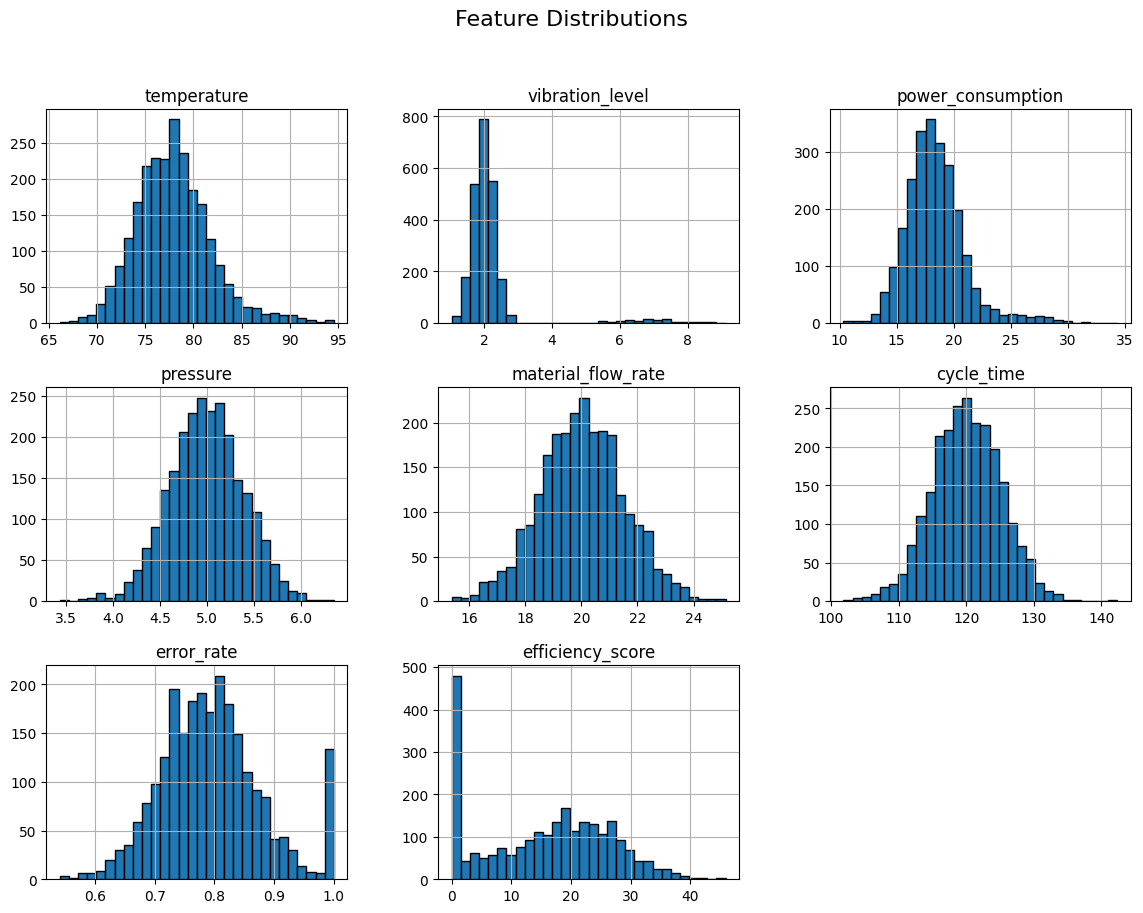

In [ ]:

num_cols = ['temperature', 'vibration_level', 'power_consumption', 'pressure',
             'material_flow_rate', 'cycle_time', 'error_rate', 'efficiency_score']

df[num_cols].hist(bins=30, figsize=(14,10), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()


## Correlation Heatmap

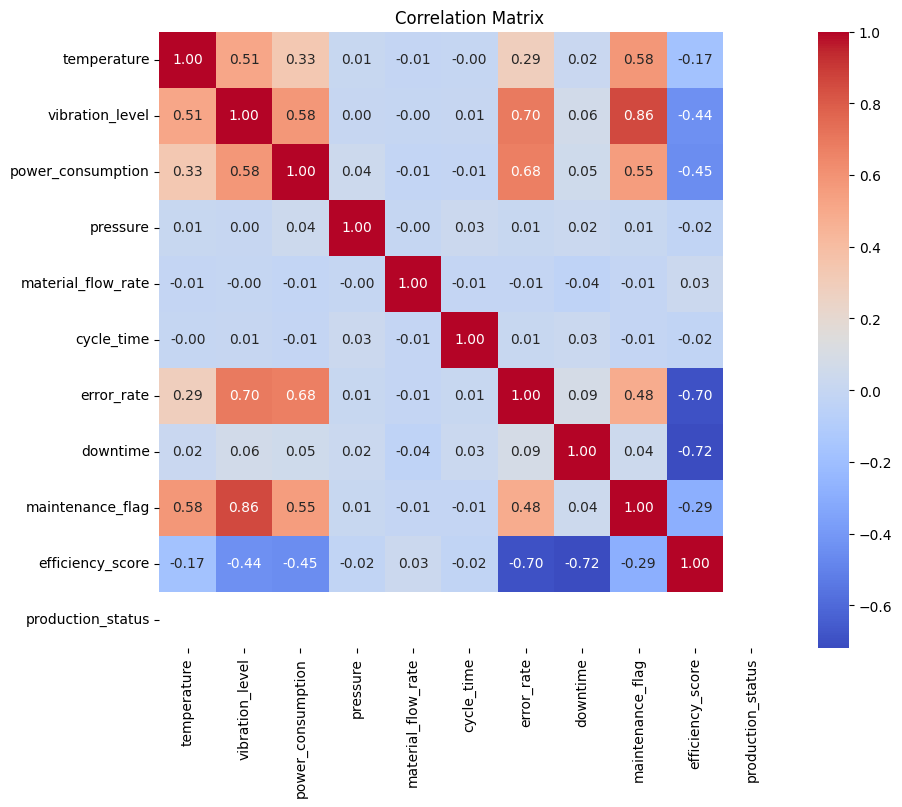

In [ ]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Machine Type Analysis

/tmp/ipython-input-4123893895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='machine_type', palette='viridis')


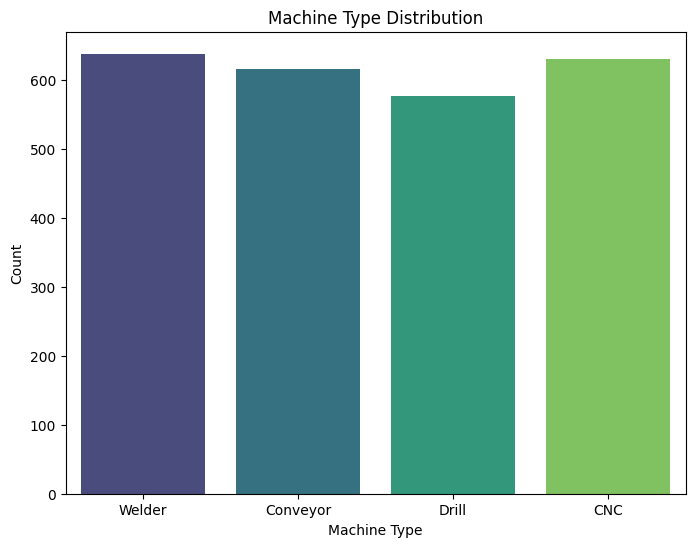

In [ ]:

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='machine_type', palette='viridis')
plt.title('Machine Type Distribution')
plt.xlabel('Machine Type')
plt.ylabel('Count')
plt.show()


## Temperature vs Efficiency Score

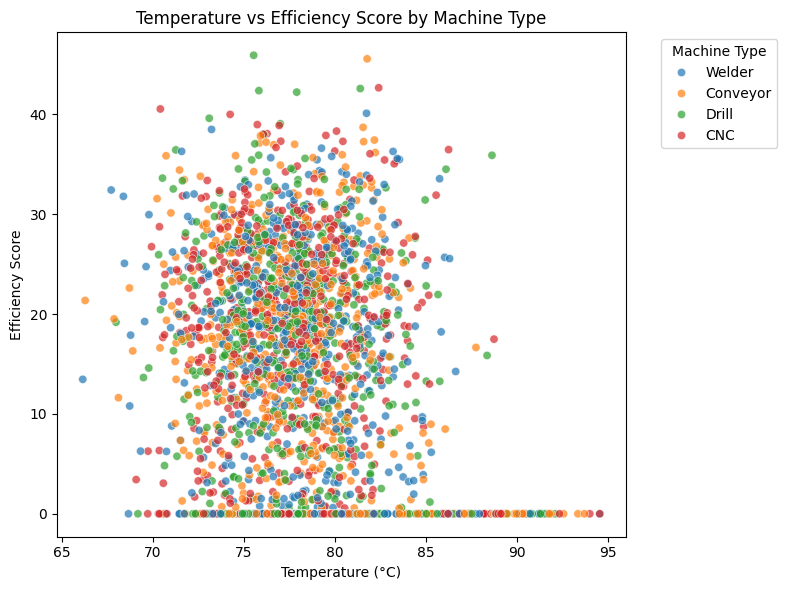

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='temperature', y='efficiency_score', hue='machine_type', alpha=0.7)
plt.title('Temperature vs Efficiency Score by Machine Type')
plt.xlabel('Temperature (°C)')
plt.ylabel('Efficiency Score')
plt.legend(title='Machine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Power Consumption vs Efficiency Score

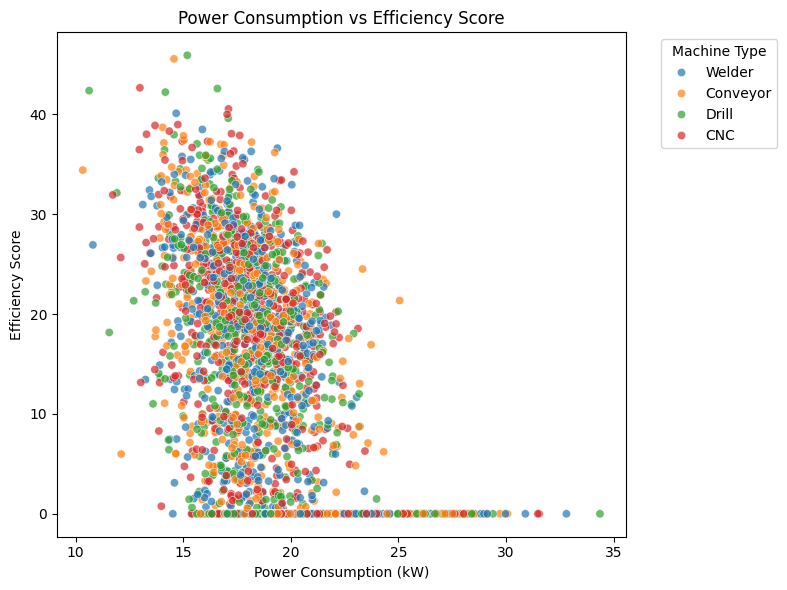

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='power_consumption', y='efficiency_score', hue='machine_type', alpha=0.7)
plt.title('Power Consumption vs Efficiency Score')
plt.xlabel('Power Consumption (kW)')
plt.ylabel('Efficiency Score')
plt.legend(title='Machine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Downtime vs Efficiency Score

/tmp/ipython-input-2187711078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='maintenance_flag', y='efficiency_score', palette='coolwarm')


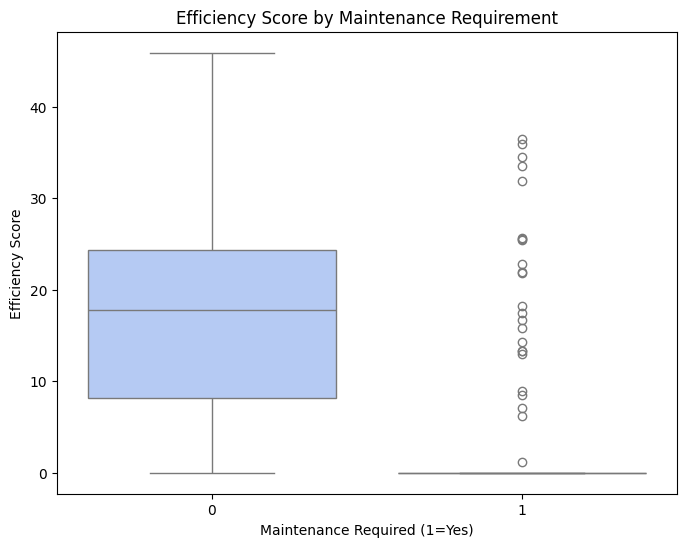

In [ ]:

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='maintenance_flag', y='efficiency_score', palette='coolwarm')
plt.title('Efficiency Score by Maintenance Requirement')
plt.xlabel('Maintenance Required (1=Yes)')
plt.ylabel('Efficiency Score')
plt.show()


## Maintenance Frequency by Machine Type

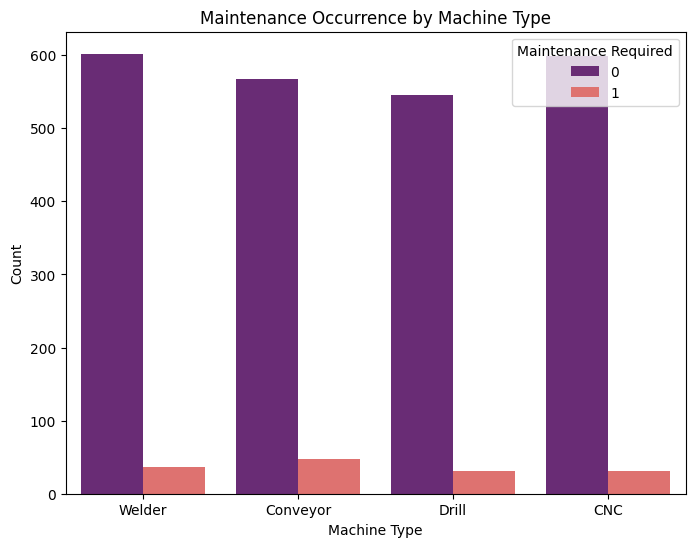

In [ ]:

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='machine_type', hue='maintenance_flag', palette='magma')
plt.title('Maintenance Occurrence by Machine Type')
plt.xlabel('Machine Type')
plt.ylabel('Count')
plt.legend(title='Maintenance Required')
plt.show()


## Efficiency Score Distribution

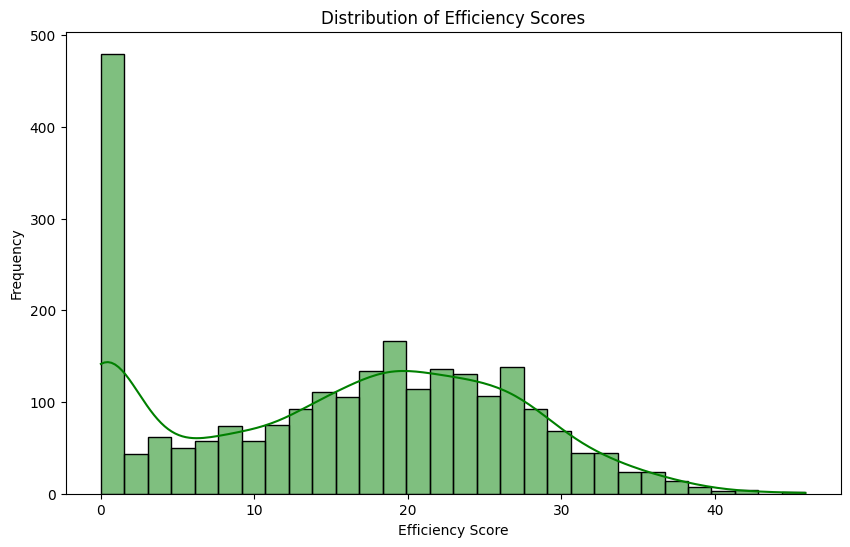

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(df['efficiency_score'], bins=30, kde=True, color='green')
plt.title('Distribution of Efficiency Scores')
plt.xlabel('Efficiency Score')
plt.ylabel('Frequency')
plt.show()
